# Week 8: Classificatiemodellen in Machine Learning

## Bibliotheken importeren

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

## Data inlezen en kolommen selecteren

In [10]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df = df.loc[:, ['Pclass', 'Sex', 'Age', 'Survived']]
df

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


## One-hot encoding van onafhankelijke niet-numerieke variabelen

In [12]:
df['Pclass'] = df['Pclass'].astype(str)
df.dtypes

Pclass       object
Sex          object
Age         float64
Survived      int64
dtype: object

In [13]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['Sex', 'Pclass']])
dummies_dataframe

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,True,False,False
4,False,True,False,False,True
...,...,...,...,...,...
886,False,True,False,True,False
887,True,False,True,False,False
888,True,False,False,False,True
889,False,True,True,False,False


In [14]:
df = pd.concat([df, dummies_dataframe], axis = 1)
df = df.drop(['Sex'], axis = 1)
df = df.loc[df['Age'].notna(), ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age', 'Survived']]
df

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,Survived
0,False,False,True,False,True,22.0,0
1,True,False,False,True,False,38.0,1
2,False,False,True,True,False,26.0,1
3,True,False,False,True,False,35.0,1
4,False,False,True,False,True,35.0,0
...,...,...,...,...,...,...,...
885,False,False,True,True,False,39.0,0
886,False,True,False,False,True,27.0,0
887,True,False,False,True,False,19.0,1
889,True,False,False,False,True,26.0,1


## Horizontaal en verticaal snijden

In [16]:
X = df.drop('Survived', axis = 1)
y = df.loc[:, ['Survived']]
X

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age
0,False,False,True,False,True,22.0
1,True,False,False,True,False,38.0
2,False,False,True,True,False,26.0
3,True,False,False,True,False,35.0
4,False,False,True,False,True,35.0
...,...,...,...,...,...,...
885,False,False,True,True,False,39.0
886,False,True,False,False,True,27.0
887,True,False,False,True,False,19.0
889,True,False,False,False,True,26.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state=42
)

In [18]:
list(X.columns)

['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age']

## Decision Tree bouwen en evalueren

### Max_depth = 2

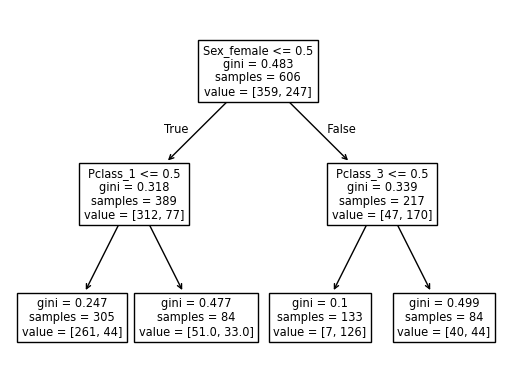

In [19]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names = X.columns)
plt.show()

In [20]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns = {0 : 'Predicted_Survived'})
model_results_frame = pd.concat([y_test.reset_index()['Survived'], predicted_df], axis = 1)
model_results_frame

,Survived,Predicted_Survived
0,0,0
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
103,0,1
104,1,1
105,0,0
106,0,0


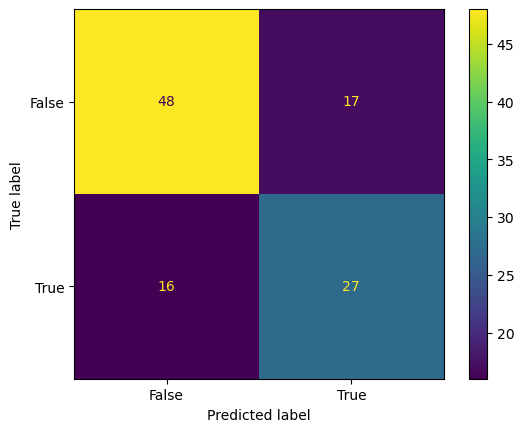

In [21]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['Survived'], model_results_frame['Predicted_Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [22]:
metrics.accuracy_score(model_results_frame['Survived'], model_results_frame['Predicted_Survived'])

0.6944444444444444

### Max_depth = 3

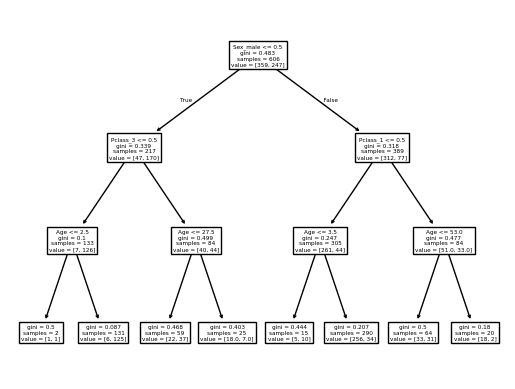

In [23]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names = X.columns)
plt.show()

In [24]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns = {0 : 'Predicted_Survived'})
model_results_frame = pd.concat([y_test.reset_index()['Survived'], predicted_df], axis = 1)
model_results_frame

,Survived,Predicted_Survived
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
103,0,1
104,1,1
105,0,0
106,0,0


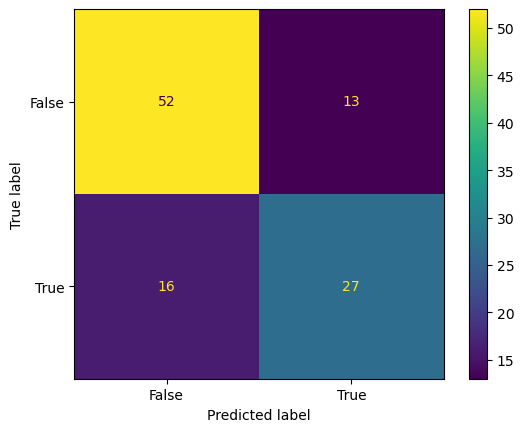

In [25]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['Survived'], model_results_frame['Predicted_Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [26]:
metrics.accuracy_score(model_results_frame['Survived'], model_results_frame['Predicted_Survived'])

0.7314814814814815

### Geen Max_depth

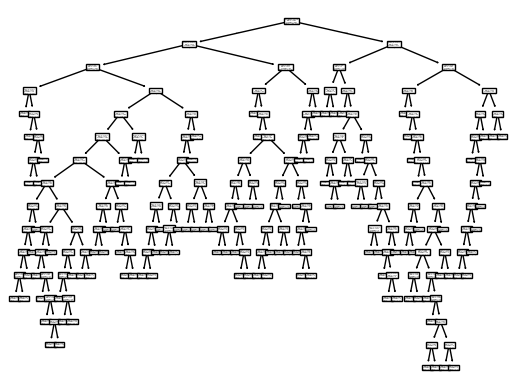

In [27]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names = X.columns)
plt.show()

## Evalueren

In [28]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns = {0 : 'Predicted_Survived'})
model_results_frame = pd.concat([y_test.reset_index()['Survived'], predicted_df], axis = 1)
model_results_frame

,Survived,Predicted_Survived
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
103,0,0
104,1,1
105,0,0
106,0,0


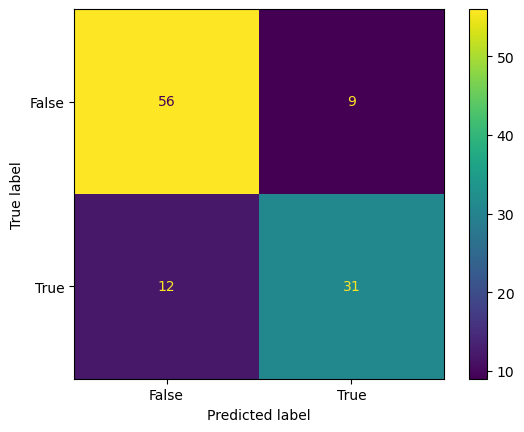

In [29]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['Survived'], model_results_frame['Predicted_Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [30]:
metrics.accuracy_score(model_results_frame['Survived'], model_results_frame['Predicted_Survived'])

0.8055555555555556